<a href="https://colab.research.google.com/github/LukeBirkett/football_analytics/blob/main/Querying_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database Querying
This this project I am going to be testing my database out by running some queries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#1. Install and Importing Packages
from mplsoccer import Pitch, VerticalPitch
mplsoccer is a data visualisation packages that has been created to make it easier to plot football data, i.e. passes a pitch. It uses elements from `matplotlib` also

In [ ]:
pip install mplsoccer

     |████████████████████████████████| 57 kB 5.7 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=d75ecc5e5e37984309dc7e9503528df5891ca7a7e53e736b27fe376f30bb7552
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [ ]:
import sqlite3
import sqlalchemy
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch

#2. Connecting to Database
Here I am going to connect the database I created in the previous project

In [ ]:
con = sqlite3.connect("/content/gdrive/MyDrive/Colab Notebooks/invinciblesSeason/premSeason_03.sqlite")
#con.close()
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)

,name
0,baseEvents
1,possession_team
2,play_pattern
3,player
4,team
5,position
6,counterpress
7,under_pressure
8,block
9,foul_won


#3. Sense Checking Queries and Plots
reading in one match of arsenal passes to see if they make sense

In [ ]:
sql = '''
SELECT id, match_id, index_, period, minute, second, duration,
       team_name, possesion_team_name, player_name, position_name, 
       recipient_name, play_pattern_name, pass_type_name, pass_outcome_name,
       x, y, x_end_location, y_end_location, length, angle, height
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 AND match_id = 3749257
'''

dfPassTemp = pd.read_sql_query(sql, con)

Getting list of arsenal players in this match

In [ ]:
dfPassTemp['player_name'].unique()

array(['Patrick Vieira', 'Dennis Bergkamp', 'Fredrik Ljungberg',
       'Laureano Bisan-Etame Mayer', 'Kolo Habib Touré',
       'Sulzeer Jeremiah "Sol" Campbell', 'Robert Pirès ', 'Ashley Cole',
       'Gilberto Aparecido da Silva', 'Thierry Henry', 'Jens Lehmann',
       'Eduardo César Daude Gaspar', 'José Antonio Reyes Calderón',
       'Martin Keown'], dtype=object)

##3.1. Ashley Cole Test
Ashley cole was Arsenals left back meaning we should see most of his pass original from the left hand side. This is an important test as historically StatsBomb and mirrored their Y-axis data

In [ ]:
ashCole_temp = dfPassTemp.query("player_name == 'Ashley Cole'")

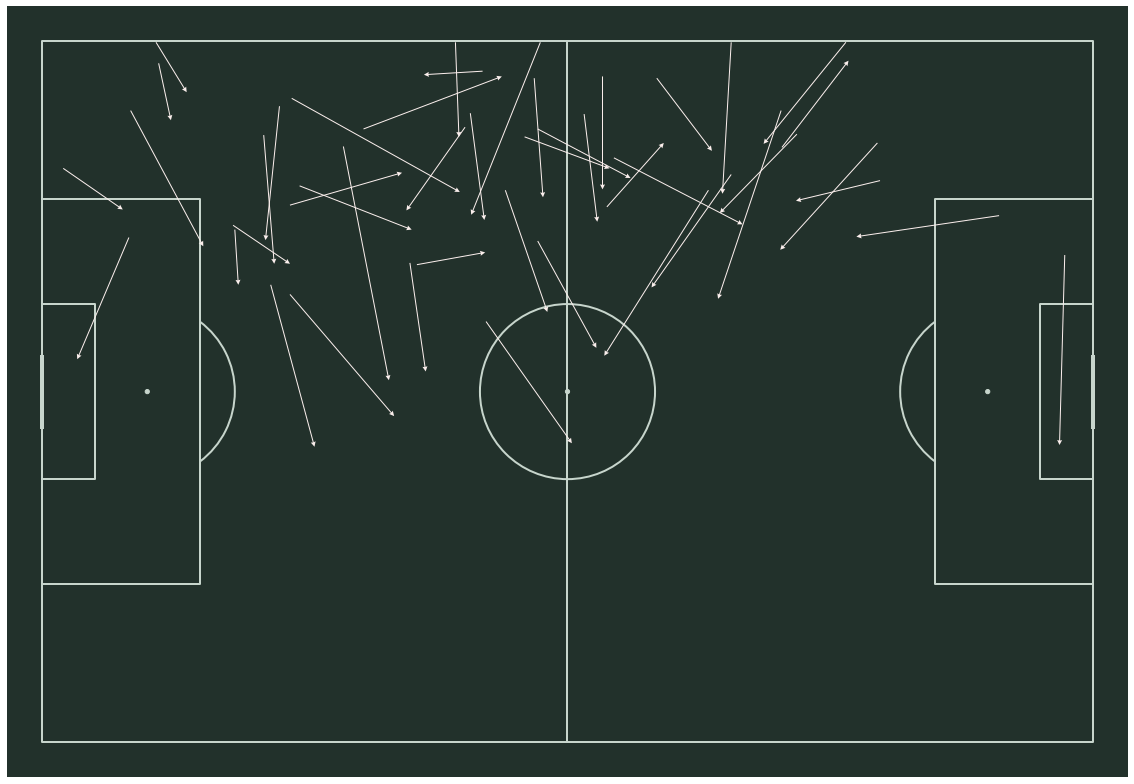

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(ashCole_temp.x, ashCole_temp.y, 
             ashCole_temp.x_end_location, ashCole_temp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

##3.2. Lauren Test

Likewise, Lauren was Arsenals right back so we should expect to see a similar thing with passes from the righthand side

In [ ]:
laurenTemp = dfPassTemp.query("player_name == 'Laureano Bisan-Etame Mayer'")

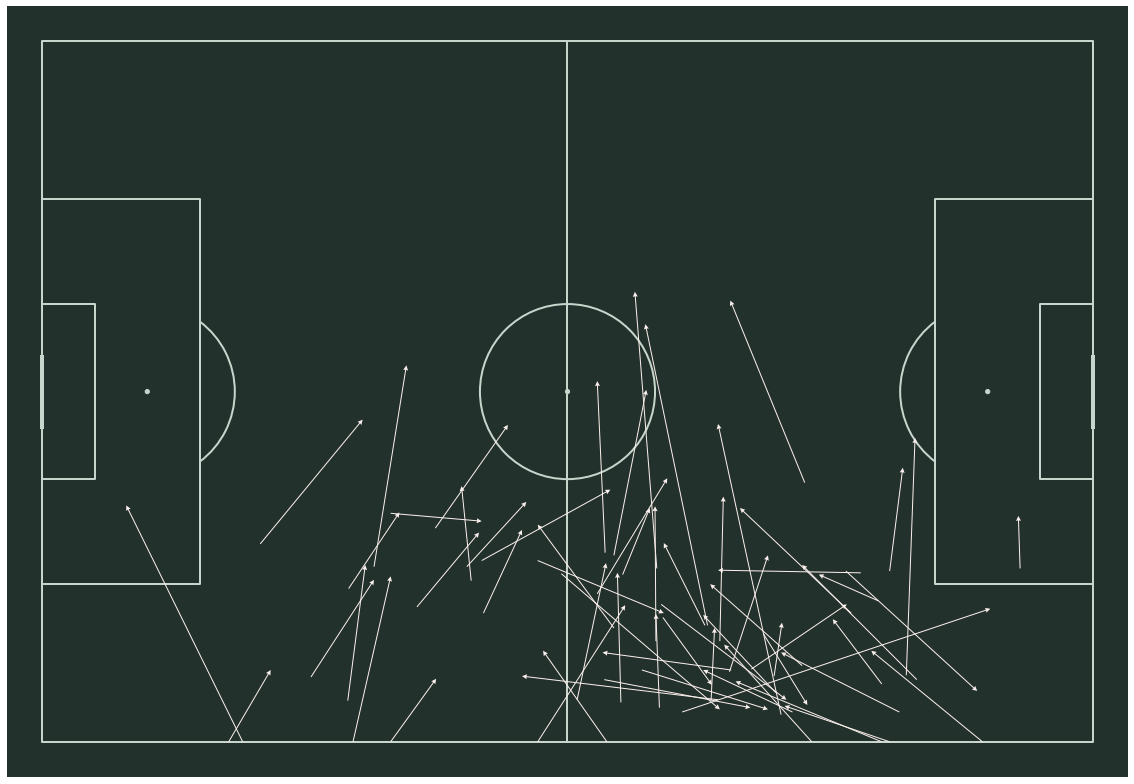

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(laurenTemp.x, laurenTemp.y, 
             laurenTemp.x_end_location, laurenTemp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

##3.3. Goalkeeper Test

Another obivous one is to test the goalkeeper passes to ensure our y-coordinates are correct. This case the goal keeper is

In [ ]:
jensTemp = dfPassTemp.query("player_name == 'Jens Lehmann'")

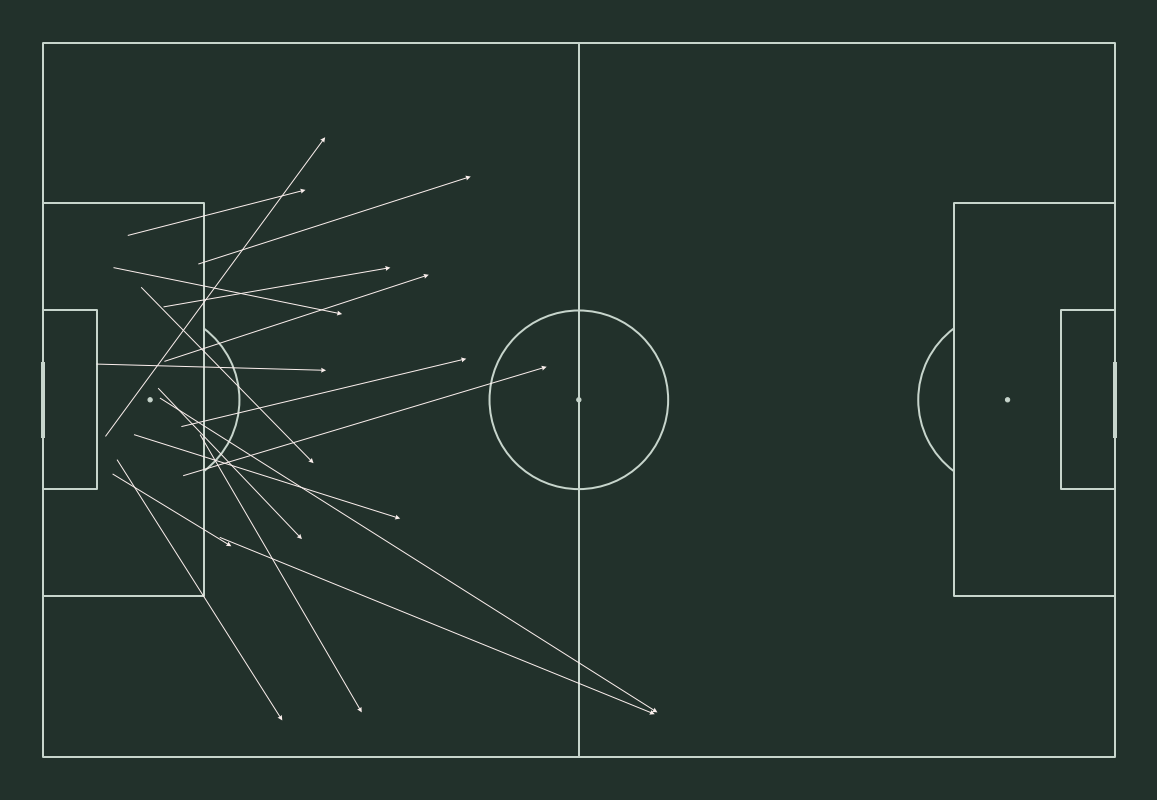

In [ ]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
pitch.arrows(jensTemp.x, jensTemp.y, 
             jensTemp.x_end_location, jensTemp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

#4.1 Top Rankings Queries
Here I am going to be constructing some querys that will give up the top ranking players given a particular metric

##4.1.1. Most Passes

In [ ]:
sql = '''
SELECT player_name, player_id, count(player_name) pass_count
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
GROUP BY player_name, player_id
ORDER BY count(player_name) desc
'''

dfMostPassTemp = pd.read_sql_query(sql, con)
dfMostPassTemp

,player_name,player_id,pass_count
0,Laureano Bisan-Etame Mayer,40222,1405
1,Patrick Vieira,15515,1355
2,Ashley Cole,12529,1327
3,Robert Pirès,19312,1271
4,Gilberto Aparecido da Silva,40221,1162
5,Kolo Habib Touré,38412,1087
6,"Sulzeer Jeremiah ""Sol"" Campbell",15637,833
7,Thierry Henry,15516,755
8,Eduardo César Daude Gaspar,26014,749
9,Fredrik Ljungberg,15754,643


##4.1.2.3 Most Passes Into Box

In [ ]:
sql = '''
with inbox as(
SELECT id, match_id, index_, period, minute, second, duration,
       team_name, possesion_team_name, player_name, player_id, position_name, 
       recipient_name, play_pattern_name, pass_type_name, pass_outcome_name,
       x, y, x_end_location, y_end_location, length, angle, height, 
       case when x > 102 and y > 18 and y < 62 then 1 else 0 end as pass_start_inbox,
       case when x_end_location > 102 and y_end_location > 18 and y_end_location < 62 then 1 else 0 end as pass_end_inbox
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
)
select player_name, player_id, count(player_name) 
from inbox
where pass_start_inbox = 0
  and pass_end_inbox = 1
group by player_name, player_id
order by count(player_name) desc
'''

dfMostPassBoxTemp = pd.read_sql_query(sql, con)
dfMostPassBoxTemp

# dfMostPassBoxTemp.dtypes

,player_name,player_id,count(player_name)
0,Thierry Henry,15516,66
1,Robert Pirès,19312,58
2,Dennis Bergkamp,15042,33
3,Fredrik Ljungberg,15754,26
4,Laureano Bisan-Etame Mayer,40222,20
5,Patrick Vieira,15515,16
6,Eduardo César Daude Gaspar,26014,15
7,Ray Parlour,24972,12
8,Ashley Cole,12529,10
9,Gilberto Aparecido da Silva,40221,9


###4.1.2.1. Henry Plot

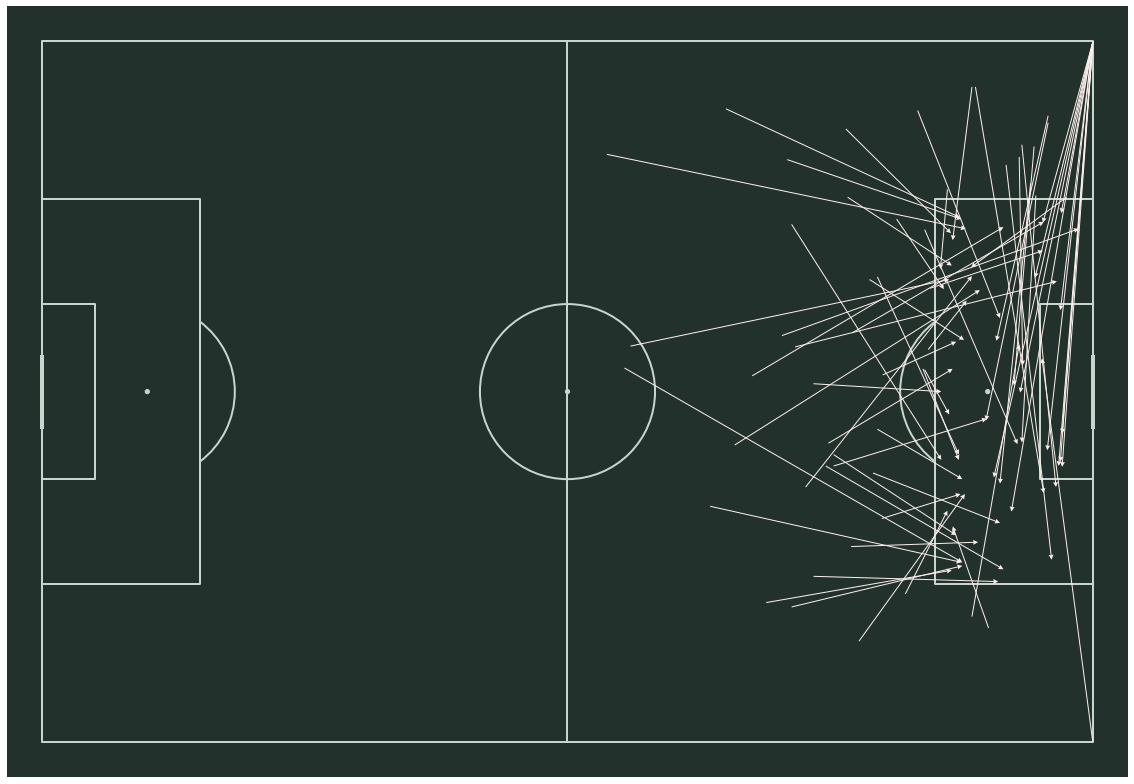

In [ ]:
sql = '''
with inbox as(
SELECT id, match_id, index_, period, minute, second, duration,
       team_name, possesion_team_name, player_name, player_id, position_name, 
       recipient_name, play_pattern_name, pass_type_name, pass_outcome_name,
       x, y, x_end_location, y_end_location, length, angle, height, 
       case when x > 102 and y > 18 and y < 62 then 1 else 0 end as pass_start_inbox,
       case when x_end_location > 102 and y_end_location > 18 and y_end_location < 62 then 1 else 0 end as pass_end_inbox
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
)
select * 
from inbox
where pass_start_inbox = 0
  and pass_end_inbox = 1
'''

HenryPassBoxTemp = pd.read_sql_query(sql, con)
HenryPassBoxTemp

HenryPassBoxTemp = HenryPassBoxTemp.query("player_id == 15516")


pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(HenryPassBoxTemp.x, HenryPassBoxTemp.y, 
             HenryPassBoxTemp.x_end_location, HenryPassBoxTemp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

###4.1.2.2. Pires Plot

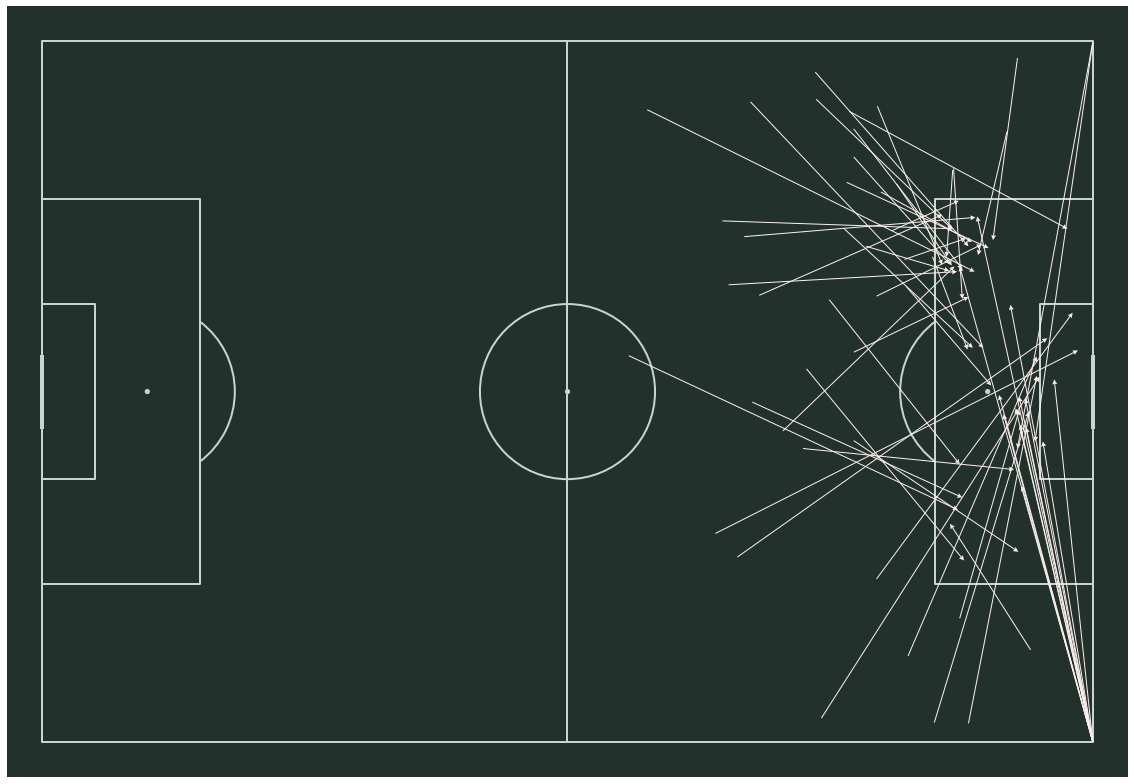

In [ ]:
PiresPassBoxTemp = pd.read_sql_query(sql, con)
PiresPassBoxTemp

PiresPassBoxTemp = PiresPassBoxTemp.query("player_id == 19312")


pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(PiresPassBoxTemp.x, PiresPassBoxTemp.y, 
             PiresPassBoxTemp.x_end_location, PiresPassBoxTemp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

###4.1.2.3. Bergkamp	 Plot

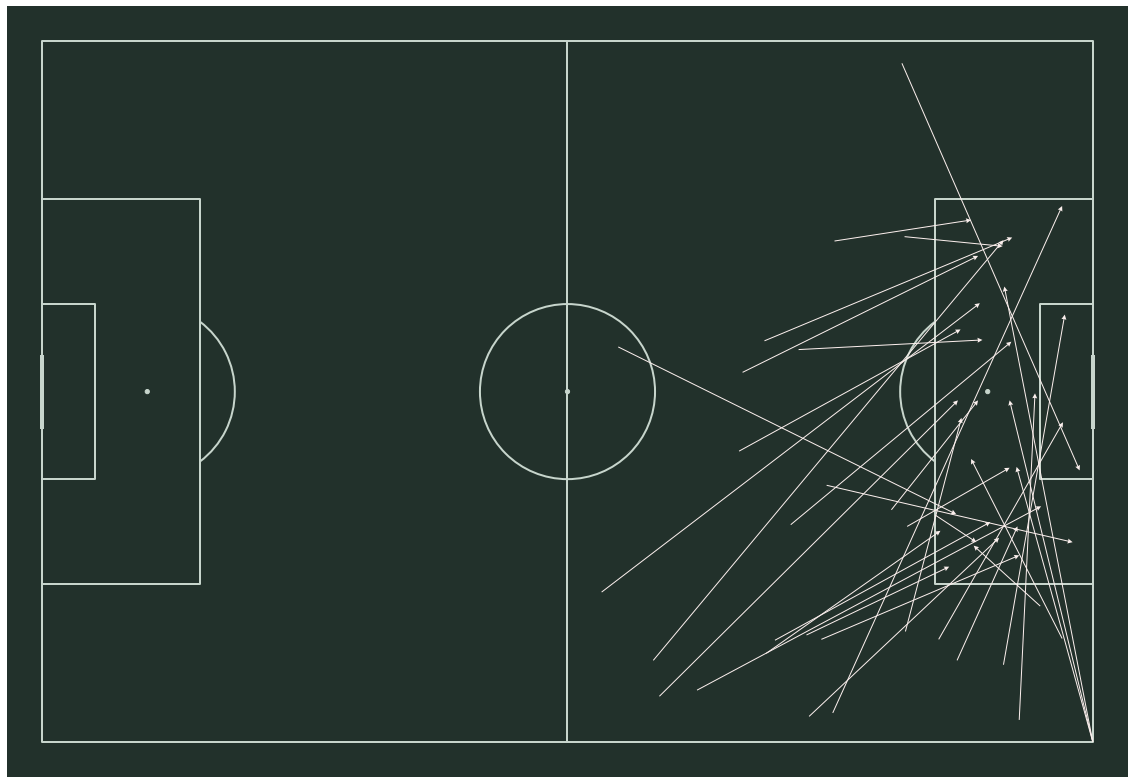

In [ ]:
BergkampPassBoxTemp = pd.read_sql_query(sql, con)
BergkampPassBoxTemp

BergkampPassBoxTemp = BergkampPassBoxTemp.query("player_id == 15042")


pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(BergkampPassBoxTemp.x, BergkampPassBoxTemp.y, 
             BergkampPassBoxTemp.x_end_location, BergkampPassBoxTemp.y_end_location, width=1, 
             ax=ax, headwidth=5, headlength=5, label='completed passes', color='#FBEFED')

## 4.1.3. Passing Pairs

In [ ]:
sql = '''
with pairs as (
SELECT player_name, player_id, recipient_name, recipient_id, count(player_name) pass_count
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
GROUP BY player_name, player_id, recipient_name, recipient_id
ORDER BY count(player_name) desc
)
select * 
from pairs
where pass_count > 100
'''

dfPassingPairs = pd.read_sql_query(sql, con)
dfPassingPairs

,player_name,player_id,recipient_name,recipient_id,pass_count
0,Ashley Cole,12529,Robert Pirès,19312.0,286
1,Robert Pirès,19312,Thierry Henry,15516.0,260
2,Laureano Bisan-Etame Mayer,40222,Gilberto Aparecido da Silva,40221.0,252
3,Robert Pirès,19312,Ashley Cole,12529.0,209
4,Ashley Cole,12529,Patrick Vieira,15515.0,204
5,Patrick Vieira,15515,Robert Pirès,19312.0,196
6,Gilberto Aparecido da Silva,40221,Laureano Bisan-Etame Mayer,40222.0,195
7,Gilberto Aparecido da Silva,40221,Patrick Vieira,15515.0,183
8,Laureano Bisan-Etame Mayer,40222,Ray Parlour,24972.0,163
9,Robert Pirès,19312,Patrick Vieira,15515.0,158


In [ ]:
sql = '''
SELECT id, match_id, index_, period, minute, second, duration,
       team_name, possesion_team_name, player_name, player_id, position_name, 
       recipient_name, recipient_id, play_pattern_name, pass_type_name, pass_outcome_name,
       x, y, x_end_location, y_end_location, length, angle, height
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
'''

dfPassTemp = pd.read_sql_query(sql, con)

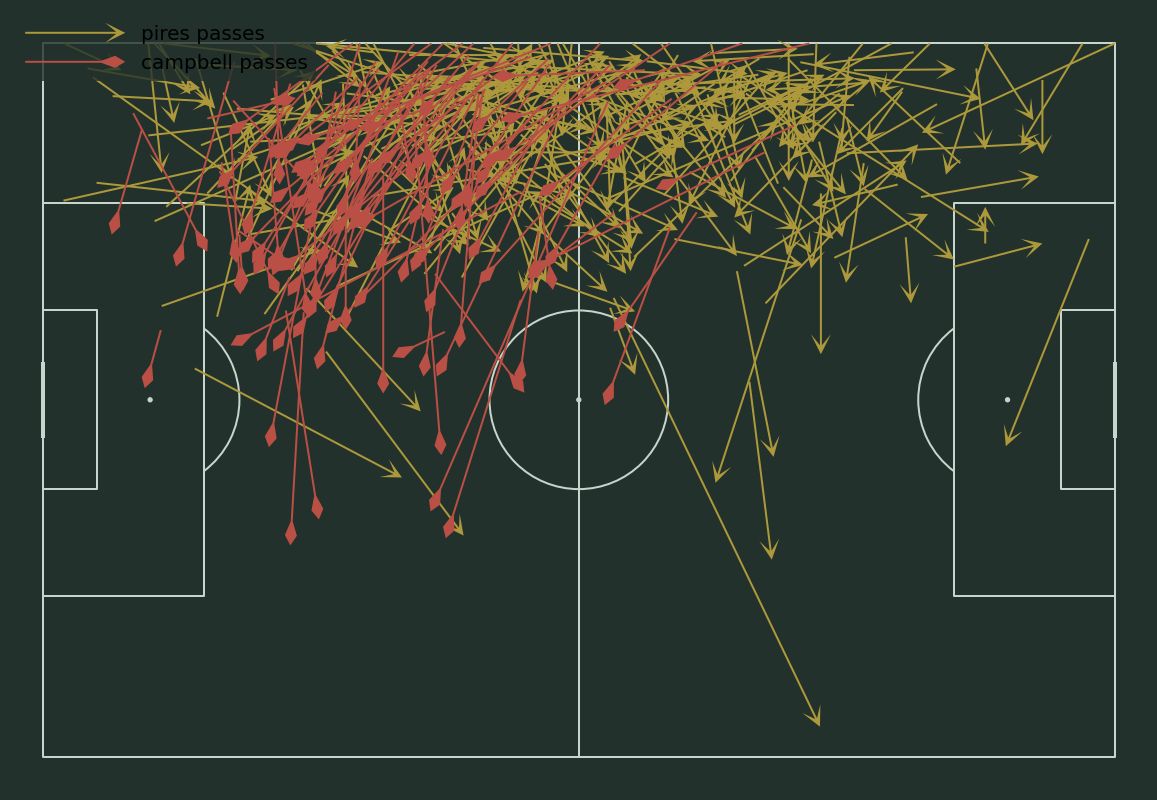

In [ ]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')


cole_pires_Temp = dfPassTemp.query("player_id == 12529 and recipient_id == 19312.0")
# Plot the completed passes
pitch.arrows(cole_pires_Temp.x, cole_pires_Temp.y,
             cole_pires_Temp.x_end_location, cole_pires_Temp.y_end_location, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='pires passes')



cole_sol_Temp = dfPassTemp.query("player_id == 12529 and recipient_id == 15637.0")
# Plot the other passes
pitch.arrows(cole_sol_Temp.x, cole_sol_Temp.y,
             cole_sol_Temp.x_end_location, cole_sol_Temp.y_end_location, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='campbell passes')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
#ax.set_title(f'{team1} passes vs {team2}', fontsize=30)

##4.1.4 Shooting Kpi Tracking

In [ ]:
sql = '''
with base_stats as(
  SELECT id, match_id, index_, period, minute, second, duration,
        team_name, possesion_team_name, player_name, player_id, position_name,
        x,y, 
        play_pattern_name, s.statsbomb_xg, s.x_end_location, s.y_end_location,
        s.shot_height, s.shot_type_name, s.shot_outcome_name, 
        s.shot_technique_name, s.shot_body_part_name,
        case when x > 102 and y > 18 and y < 62 then 1 else 0 end as shot_in_box,
        case when shot_outcome_name = 'Saved' or shot_outcome_name = 'Goal' then 1 else 0 end as on_target
  FROM baseEvents b
  LEFT JOIN possession_team USING(id)
  LEFT JOIN team USING(id)
  LEFT JOIN play_pattern USING(id)
  LEFT JOIN player USING(id)
  LEFT JOIN position USING(id)
  LEFT JOIN location using(id)
  JOIN shotMain s USING(id)
  WHERE team_name = 'Arsenal'
    and shot_type_name != 'Penalty'
), shots as(
  select player_name, player_id, 
        count(player_name) shots,
        count(case on_target when 1 then 1 else null end) shots_on_target,
        count(case shot_in_box when 1 then 1 else null end) shots_inside_box,
        count(case shot_in_box when 0 then 1 else null end) shots_outside_box,
        count(case shot_outcome_name when 'Post' then 1 else null end) shot_hit_post,
        count(case shot_type_name when 'Free Kick' then 1 else null end) freekick_shots,
        count(case shot_technique_name when 'Volley' then 1 else null end) volleys,
        count(case shot_body_part_name when 'Head' then 1 else null end) headers
  from base_stats
  group by player_name, player_id 
  order by count(case shot_outcome_name when 'Goal' then 1 else null end) desc
), goals as(
  select player_name, player_id, 
        count(player_name) goals,
        count(case shot_in_box when 1 then 1 else null end) goals_inside_box,
        count(case shot_in_box when 0 then 1 else null end) goals_outside_box,
        count(case shot_type_name when 'Free Kick' then 1 else null end) freekick_goals,
        count(case shot_technique_name when 'Volley' then 1 else null end) volley_goals,
        count(case shot_body_part_name when 'Head' then 1 else null end) header_goals
  from base_stats
  where shot_outcome_name = 'Goal'
  group by player_name, player_id 
  order by count(case shot_outcome_name when 'Goal' then 1 else null end) desc
), xg as(
select player_name, player_id, 
       sum(statsbomb_xg) xg,
       sum(case shot_in_box when 1 then statsbomb_xg else 0 end) xg_inside_box,
       sum(case shot_in_box when 0 then statsbomb_xg else 0 end) xg_outside_box,
       sum(case shot_type_name when 'Free Kick' then statsbomb_xg else 0 end) freekick_xg,
       sum(case shot_technique_name when 'Volley' then statsbomb_xg else 0 end) volley_xg,
       sum(case shot_body_part_name when 'Head' then statsbomb_xg else 0 end) header_xg
from base_stats
group by player_name, player_id 
order by count(case shot_outcome_name when 'Goal' then 1 else null end) desc
), penultimate as(
  select s.player_name, s.player_id,
        s.shots, shots_on_target, case when g.goals is null then 0 else g.goals end goals, xg,
        shots_inside_box, case when goals_inside_box is null then 0 else goals_inside_box end goals_inside_box, xg_inside_box,
        shots_outside_box, case when goals_outside_box is null then 0 else goals_outside_box end goals_outside_box, xg_outside_box, 
        freekick_shots, case when freekick_goals is null then 0 else freekick_goals end freekick_goals, freekick_xg,
        volleys, case when volley_goals is null then 0 else volley_goals end volley_goals, volley_xg,
        headers, case when header_goals is null then 0 else header_goals end header_goals, header_xg
  from shots s
  left join goals g using(player_id)
  left join xg xg using(player_id)
)
select player_name, player_id,
       shots, shots_on_target, round((shots_on_target*1.0)/(shots*1.0),2) onTarget_Rate,  goals, round((goals*1.0)/(shots*1.0),2) conversion_Rate, round(xg,2) xg, round((goals - xg),2) xgDiff,
       shots_inside_box, goals_inside_box, round((goals_inside_box*1.0)/(shots_inside_box*1.0),2) inside_conversion_Rate, round(xg_inside_box,2) xg_inside_box, round((goals_inside_box - xg_inside_box),2) inside_xgDiff,
       shots_outside_box, goals_outside_box, round((goals_outside_box*1.0)/(shots_outside_box*1.0),2) outside_conversion_Rate, round(xg_outside_box,2) xg_outside_box, round((goals_outside_box - xg_outside_box),2) outside_xgDiff, 
       freekick_shots, freekick_goals, round((freekick_goals*1.0)/(freekick_shots*1.0),2) FK_conversion_Rate, round(freekick_xg,2) freekick_xg, round((freekick_goals - freekick_xg),2) FK_xgDiff,
       headers, header_goals, round(header_xg,4) header_xg
from penultimate
'''



dfShoot = pd.read_sql_query(sql, con)
dfShoot

,player_name,player_id,shots,shots_on_target,onTarget_Rate,goals,conversion_Rate,xg,xgDiff,shots_inside_box,goals_inside_box,inside_conversion_Rate,xg_inside_box,inside_xgDiff,shots_outside_box,goals_outside_box,outside_conversion_Rate,xg_outside_box,outside_xgDiff,freekick_shots,freekick_goals,FK_conversion_Rate,freekick_xg,FK_xgDiff,headers,header_goals,header_xg
0,Thierry Henry,15516,169,80,0.47,20,0.12,17.63,2.37,73,15,0.21,14.19,0.81,96,5,0.05,3.43,1.57,31,3,0.10,1.63,1.37,14,0,1.4484
1,Robert Pirès,19312,49,23,0.47,14,0.29,7.08,6.92,24,11,0.46,6.13,4.87,25,3,0.12,0.95,2.05,0,0,NaN,0.00,0.00,3,0,0.3002
2,Dennis Bergkamp,15042,43,21,0.49,4,0.09,4.10,-0.10,23,4,0.17,3.00,1.00,20,0,0.00,1.10,-1.10,0,0,NaN,0.00,0.00,1,0,0.1137
3,Fredrik Ljungberg,15754,43,21,0.49,4,0.09,4.99,-0.99,29,3,0.10,4.36,-1.36,14,1,0.07,0.63,0.37,1,0,0.00,0.04,-0.04,3,0,0.1645
4,Gilberto Aparecido da Silva,40221,24,8,0.33,3,0.13,1.52,1.48,10,3,0.30,1.12,1.88,14,0,0.00,0.39,-0.39,0,0,NaN,0.00,0.00,5,1,0.5536
5,Patrick Vieira,15515,17,5,0.29,3,0.18,3.28,-0.28,11,3,0.27,3.16,-0.16,6,0,0.00,0.12,-0.12,0,0,NaN,0.00,0.00,6,0,0.9025
6,Sylvain Wiltord,15512,13,7,0.54,3,0.23,2.76,0.24,8,3,0.38,2.61,0.39,5,0,0.00,0.15,-0.15,0,0,NaN,0.00,0.00,0,0,0.0000
7,Eduardo César Daude Gaspar,26014,22,4,0.18,2,0.09,1.26,0.74,7,1,0.14,0.84,0.16,15,1,0.07,0.42,0.58,7,1,0.14,0.25,0.75,3,0,0.3743
8,José Antonio Reyes Calderón,23816,14,6,0.43,1,0.07,2.40,-1.40,8,1,0.13,1.84,-0.84,6,0,0.00,0.56,-0.56,0,0,NaN,0.00,0.00,1,0,0.1294
9,Kolo Habib Touré,38412,13,3,0.23,1,0.08,2.25,-1.25,12,1,0.08,2.22,-1.22,1,0,0.00,0.03,-0.03,0,0,NaN,0.00,0.00,7,1,1.1228


##4.1.5. Shot Play Henry

In [ ]:
sql = '''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN shotMain p USING(id)
WHERE team_name = 'Arsenal'
  and shot_type_name != 'Penalty'
'''

shotTemp = pd.read_sql_query(sql, con)
shotTemp

HenryShotTemp = shotTemp.query("player_id == 15516")

https://mplsoccer.readthedocs.io/en/latest/index.html

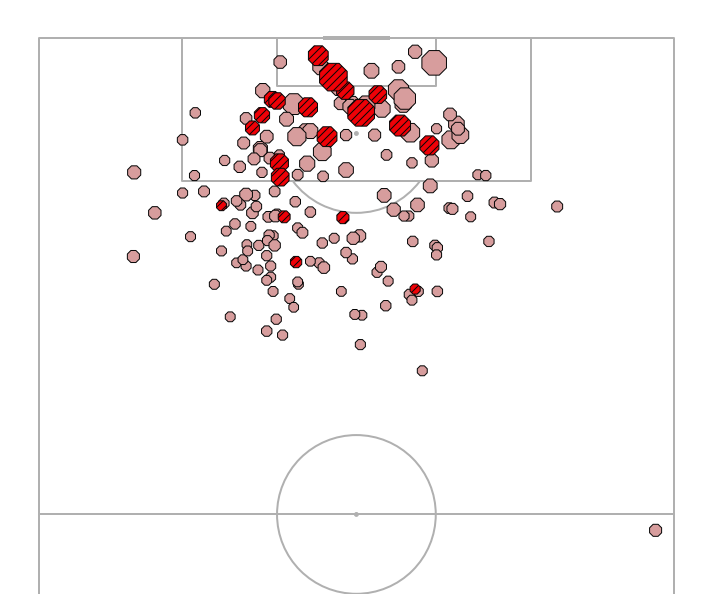

In [ ]:
HenryGoalsTemp = HenryShotTemp.query("shot_outcome_name == 'Goal'")
HenryMissTemp = HenryShotTemp.query("shot_outcome_name != 'Goal'")


pitch = VerticalPitch(pad_bottom=10,  # pitch extends slightly below halfway line
                      half=True)  # control the goal transparency
fig, ax = pitch.draw(figsize=(10, 10))

sc2 = pitch.scatter(HenryMissTemp.x, HenryMissTemp.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(HenryMissTemp.statsbomb_xg * 900) + 100, # dicates size of hex
                   c='#D79D9D',
                   edgecolors='#060606',
                   marker='8', # other markers: https://matplotlib.org/stable/api/markers_api.html
                   ax=ax)


sc = pitch.scatter(HenryGoalsTemp.x, HenryGoalsTemp.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(HenryGoalsTemp.statsbomb_xg * 900) + 100, # dicates size of hex
                   c='#EF0107',  # arsenals html red
                   #hatch='///',
                   edgecolors='#060606',
                   marker='8', # other markers: https://matplotlib.org/stable/api/markers_api.html
                   ax=ax)